<a href="https://colab.research.google.com/github/prof-Thiago-Nunes/Computer_vision/blob/main/Sensoriamento_remoto_nas_terras_Yanomami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sensoriamento remoto contra o garimpo ilegal em terras Yanomami

## 1. Introdução
O garimpo nas terras Yanomami é uma atividade ilegal e altamente prejudicial para o meio ambiente e para as comunidades indígenas que habitam essa região. As terras Yanomami estão localizadas na Amazônia brasileira, abrangendo áreas do Brasil e da Venezuela. É uma das maiores reservas indígenas do país, protegida por lei e designada para a preservação da cultura e do modo de vida dos Yanomami.


No entanto, o garimpo ilegal de ouro tem sido uma séria ameaça para as terras Yanomami. Os garimpeiros ilegais invadem o território indígena em busca de ouro, causando uma série de problemas graves. Essas atividades ilícitas resultam na destruição de florestas, poluição de rios e contaminação do solo por mercúrio, um elemento utilizado no processo de extração do ouro.


Além dos danos ambientais, o garimpo ilegal tem impactos sociais e culturais significativos sobre as comunidades Yanomami. O contato com garimpeiros expõe os indígenas a doenças, violência e conflitos. A introdução de bens de consumo modernos, como armas de fogo e bebidas alcoólicas, também causa mudanças negativas nas dinâmicas sociais e culturais tradicionais.

<center><img src="https://th.bing.com/th/id/OIP._ohXf7tgHUCfXcfUrTS0fgHaE8?pid=ImgDet&rs=1" height=350></center>


O governo brasileiro, em parceria com instituições e organizações indígenas, tem realizado esforços para combater o garimpo ilegal nas terras Yanomami. A fiscalização e operações de repressão têm sido realizadas, mas ainda é um desafio contínuo devido à vasta extensão do território e à presença constante de garimpeiros ilegais.


É importante destacar que o garimpo ilegal nas terras Yanomami é uma violação dos direitos indígenas e das leis ambientais. É fundamental que haja uma atuação firme e contínua para proteger essa importante reserva indígena e buscar soluções sustentáveis para o desenvolvimento da região que respeitem os direitos e a autodeterminação dos Yanomami.

### 1.1. Sensoriamento remoto por satélites

Nos últimos anos, houve um crescimento significativo no acesso aos dados geoespaciais. Especificamente, na última década, testemunhamos um aumento exponencial na disponibilidade de dados de satélite de excelente qualidade, muitos dos quais são oferecidos gratuitamente.

As imagens capturadas por satélites desempenham um papel fundamental, fornecendo informações essenciais para prever desastres, compreender as alterações climáticas e garantir o abastecimento de água, entre uma ampla gama de outros usos.

<center><img src="https://developers.google.com/static/earth-engine/images/Code_editor.png" height=350></center>

Essas imagens, provenientes de várias fontes como NASA, USGS, NOAA e ESA, incluem uma ampla gama de informações, como temperatura da superfície terrestre, vegetação e outros parâmetros biofísicos. Sendo assim, permitem uma compreensão mais detalhada do nosso planeta e a capacidade de monitorar e prever uma variedade de fenômenos naturais e induzidos pelo homem.

Neste notebook, iremos explorar o [Google Earth Engine (GEE)](https://developers.google.com/earth-engine/guides/python_install), uma plataforma que coloca esses recursos de dados à nossa disposição. O Google Earth Engine oferece um catálogo de imagens e dados ambientais vasto e atualizado, que inclui dados históricos de satélites de observação da Terra que remontam a décadas.

Neste projeto, será desenvolvido um *pipeline* que envolve a extração de diferentes bandas de dados do satélite Landsat 8, com entuito de utilizar esses dados para calcular o Índice de Vegetação por Diferença Normalizada (NDVI). Em seguida, após exportar as imagens resultantes como GeoTiff, será realizada uma análise de desmatamento na área de preservação Yanomami localiada nos Estados do Amazonas e Roraima.

### 1.2. O Google Earth Engine (Python API)

O Google Earth Engine é uma plataforma que permite aos usuários acessar e analisar grandes quantidades de dados geoespaciais. Ele fornece uma API em Python que permite aos desenvolvedores programar e interagir com os recursos do Google Earth Engine.

Através do Google Earth Engine Python API, é possível realizar diversas tarefas relacionadas à análise e processamento de dados geoespaciais. Isso inclui a importação de conjuntos de dados, como imagens de satélite e dados de sensores, a realização de operações de processamento remoto, como filtragem, classificação e cálculos de índices, e a visualização dos resultados por meio de mapas interativos.

O **Earth Engine Data Catalog** é um catálogo público que inclui uma variedade de conjuntos de dados *raster* padrão de ciências da Terra que podem ser importados para o seu ambiente de script com um único clique. Nele você pode encontrar, por exemplo, conjuntos de dados como:

* [elevação global SRTM](https://developers.google.com/earth-engine/datasets/catalog/USGS_SRTMGL1_003) com resolução de 30 m
* [conjuntos de dados do OpenLandMap](https://developers.google.com/earth-engine/datasets/catalog/OpenLandMap_SOL_SOL_CLAY-WFRACTION_USDA-3A1A1A_M_v02) com propriedades do solo numa resolução de 250 m
* dados de temperatura, precipitação e evapotranspiração do [GRIDMET](https://developers.google.com/earth-engine/datasets/catalog/IDAHO_EPSCOR_GRIDMET).

Além disso, o catálogo também permite o upload de seus próprios dados raster ou dados vetoriais para uso privado ou compartilhamento em seus scripts. Os dados disponíveis incluem imagens de uma variedade de satélites e sensores, tornando-o um recurso inestimável para a análise geoespacial.

## 2. Processos metodológicos
Nesta etapa será construido o script que fará o sensoriamento remoto das terras Yanomami

### 2.1 Importando os pacotes necessários

In [1]:
# Importando os pacotes necessários
import ee
import cv2
import folium
import numpy as np
from google.colab import drive
from osgeo import gdal # Manipulando arquivos geoespaciais
import matplotlib.pyplot as plt

# Imprimindo o gráfico diretamente no notebook
%matplotlib inline

# Configurando o matplotlib para a escala de cinza 'gray'
plt.rcParams['image.cmap'] = 'gray'


### 2.2 Disparando o fluxo de autenticação e iniciando a biblioteca



In [ ]:
# Disparar a autenticação
ee.Authenticate()

# Iniciar a biblioteca
ee.Initialize()

In [3]:
# Acessando uma imagem dentro de um catálogo
print(ee.Image("NASA/NASADEM_HGT/001").get('title').getInfo())

NASADEM: NASA NASADEM Digital Elevation 30m


In [4]:
ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_044034_20201028')

### 2.3 Extraindo imagens (GeoTiff) do Google Earth Engine

A extração de imagens do Google Earth Engine envolve a execução de scripts para solicitar e processar dados provenientes de imagens de satélite. A plataforma do Google Earth Engine permite a seleção de uma coleção específica de imagens, aplicando filtros temporais e espaciais para escolher aquelas que atendam às necessidades do usuário. Em seguida, algoritmos de processamento de imagem são aplicados para manipular os dados da imagem. Por meio dessa plataforma, é possível extrair informações sobre vegetação, dados de cobertura do solo e realizar análises de mudança ao longo do tempo, além de outras funções.

In [5]:
def cloud_mask_l8(image):
  qa = image.select('QA_PIXEL')

  # Os bits 3 e 5 representam, respectivamente, para nuvens e sombra de nuvens
  cloudShadowBitMask = 1 << 3
  cloudsBitMask = 1 << 5

  # Ambas as flags devem ser definidas como zero, indicando condições claras.

  mask = qa.bitwiseAnd(cloudShadowBitMask).eq(0).And(qa.bitwiseAnd(cloudsBitMask).eq(0))


  return image.updateMask(mask)


In [6]:
# Importa a coleção USGS Landsat 8 Level 2, Collection 2, Tier 1
# lc = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')

# Define um polígono em torno de um território Yanomami, AM.
geometry = ee.Geometry.Polygon(
    [[  [-64.82418027875389, 4.25930398613221],
        [-64.82418027875389, 0.4892225878620735],
        [-61.49968553518751, 0.4892225878620735],
        [-61.49968553518751, 4.25930398613221]]],
        None,
        False)
# Definindo os parâmetros para o Landsat8.
landsat8_params = {
    "bands": ['SR_B4', 'SR_B3', 'SR_B2'],
    "min" : 0.0,
    "max" : 30000.0,
    "gamma": 1.0
}

# Filtrando a imagem da coleção do Landsat 8 iniciando no ano de 2013, aplicando também a máscara de nuvens
dataset13 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2').filterDate('2013-01-01', '2013-12-31').map(cloud_mask_l8)
lansat13 = dataset13.median().clip(geometry)

# Filtra a imagem da coleção do Landsat 8 pelo ano de 2018 e aplica a máscara de nuvens.
dataset18 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2').filterDate('2018-01-01', '2018-12-31').map(cloud_mask_l8)
lansat18 = dataset18.median().clip(geometry)

# Filtra a imagem da coleção do Landsat 8 pelo ano de 2023 e aplica a máscara de nuvens.
dataset23 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2').filterDate('2023-01-01', '2023-12-31').map(cloud_mask_l8)
lansat23 = dataset23.median().clip(geometry)


### 2.4. Exibindo imagens de satélite em mapas

Uma das principais vantagens do Google Earth Engine é sua capacidade de visualizar dados de sensoriamento remoto de maneira eficaz. Após a seleção e o processamento dos dados da imagem, você pode exibir as imagens de satélite em um mapa interativo. Isso é feito adicionando as imagens processadas como camadas em um Mapa do Google Earth Engine. Este mapa pode ser explorado e manipulado interativamente, permitindo uma visão clara e detalhada dos dados.

In [7]:
def add_ee_layer(self, ee_image_object, vis_params, name):
    """
    Adiciona uma camada de imagem do Google Earth Engine a um mapa do folium.

    Args:
        self (object): Objeto do mapa folium ao qual a camada será adicionada.
        ee_image_object (ee.image.Image): Imagem do Google Earth Engine para ser adicionada ao mapa folium.
        vis_params (dict): Parâmetros de visualização para a imagem.
            Este dicionário deve conter pelo menos uma propriedade 'bands'.
            Por exemplo, { 'bands': ['SR_B4', 'SR_B3', 'SR_B2'], 'max': 0.3 }.
        name (str): Nome da camada que será adicionada.

    Retorna:
        None

    Exemplo:
        # Define um mapa folium
        mapa = folium.Map(location=[-15.783333, -47.866667], zoom_start=12)

        # Imagem do GEE
        imagem = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_220071_20170805')

        # Parâmetros de visualização
        vis = { 'bands': ['B4', 'B3', 'B2'], 'max': 0.3 }

        # Adicione a imagem ao mapa
        mapa.add_ee_layer(imagem, vis, 'Brasilia Landsat')

        # Exibe o mapa
        display(mapa)

    """
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

# Adiciona o método de desenho do Google Earth Engine ao folium.
folium.Map.add_ee_layer = add_ee_layer

# Centraliza o mapa em uma parte da terra Yanomami
map = folium.Map(location = (0.1250824,  -65.1334233), zoom_start = 12)

# Adicionando as imagens geradas ao mapa.
map.add_ee_layer(lansat13, landsat8_params, '2013')
map.add_ee_layer(lansat18, landsat8_params, '2018')
map.add_ee_layer(lansat23, landsat8_params, '2023')

# Adiciona um painel de controle de camadas ao mapa.
map.add_child(folium.LayerControl())

# Exibe o mapa.
display(map)


### 2.4. Salvando imagens do Google Earth como GeoTiff

O Google Earth Engine possibilita a exportação de dados processados, incluindo imagens de satélite, em diversos formatos. Entre eles, destaca-se o GeoTiff, um formato de imagem TIFF que incorpora metadados geoespaciais, viabilizando a utilização da imagem em sistemas de informação geográfica (GIS). Para efetuar o salvamento das imagens como GeoTiff, é necessário configurar uma tarefa de exportação por meio do Editor de Código do Google Earth Engine e selecionar o Google Drive como destino da exportação. Dessa forma, a imagem processada será armazenada no Google Drive, estando pronta para ser baixada e empregada em análises ou visualizações GIS adicionais.

In [8]:
# Definindo um poligono com base em novas coordenadas geográficas
geometry = ee.Geometry.Polygon(
    [[  [-64.82418027875389, 4.25930398613221],
        [-64.82418027875389, 0.4892225878620735],
        [-61.49968553518751, 0.4892225878620735],
        [-61.49968553518751, 4.25930398613221]]],
        None,
        False)

# Define os parâmetros para Landsat8.
landsat8_params = {
  "bands": ['SR_B4', 'SR_B3', 'SR_B2'],
  "min": 0.0,
  "max": 30000.0,
  "gamma": 1.0
}

# Filtra a imagem da coleção do Landsat 8 pelo ano de 2013 e aplica a máscara de nuvens.
dataset13 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2').filterDate('2013-01-01', '2013-12-31').map(cloud_mask_l8)
lansat13 = dataset13.median().clip(geometry)

# Filtra a imagem da coleção do Landsat 8 pelo ano de 2018 e aplica a máscara de nuvens.
dataset18 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2').filterDate('2018-01-01', '2018-12-31').map(cloud_mask_l8)
lansat18 = dataset18.median().clip(geometry)

# Filtra a imagem da coleção do Landsat 8 pelo ano de 2023 e aplica a máscara de nuvens.
dataset23 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2').filterDate('2023-01-01', '2023-12-31').map(cloud_mask_l8)
lansat23 = dataset23.median().clip(geometry)


In [9]:
task_config = {
    'folder': 'deforestation',
    'scale': 30,
    'region': geometry,
    'fileFormat': 'GeoTIFF',
    'maxPixels': 1e9,
    'formatOptions' : {
        'cloudOptimized' : True
    }
}

task1 = ee.batch.Export.image.toDrive(lansat13, description= '2013api', **task_config)
task2 = ee.batch.Export.image.toDrive(lansat18, description= '2018api', **task_config)
task3 = ee.batch.Export.image.toDrive(lansat23, description= '2023api', **task_config)


In [10]:
task1.start()
task2.start()
task3.start()


In [11]:
task1.status()

{'state': 'READY',
 'description': '2013api',
 'creation_timestamp_ms': 1689291391746,
 'update_timestamp_ms': 1689291391746,
 'start_timestamp_ms': 0,
 'task_type': 'EXPORT_IMAGE',
 'id': 'IAAAYA7CTZCZVQJHEK6T46MC',
 'name': 'projects/earthengine-legacy/operations/IAAAYA7CTZCZVQJHEK6T46MC'}

In [15]:
task1.status()

{'state': 'RUNNING',
 'description': '2013api',
 'creation_timestamp_ms': 1689291391746,
 'update_timestamp_ms': 1689291407929,
 'start_timestamp_ms': 1689291403651,
 'task_type': 'EXPORT_IMAGE',
 'attempt': 1,
 'id': 'IAAAYA7CTZCZVQJHEK6T46MC',
 'name': 'projects/earthengine-legacy/operations/IAAAYA7CTZCZVQJHEK6T46MC'}

In [46]:
task1.status()

{'state': 'COMPLETED',
 'description': '2013api',
 'creation_timestamp_ms': 1689291391746,
 'update_timestamp_ms': 1689292643434,
 'start_timestamp_ms': 1689291403651,
 'task_type': 'EXPORT_IMAGE',
 'destination_uris': ['https://drive.google.com/#folders/1RyeEEWbQPcqFQXZ16ZAoHHwyYaIZatyY'],
 'attempt': 1,
 'batch_eecu_usage_seconds': 21728.66015625,
 'id': 'IAAAYA7CTZCZVQJHEK6T46MC',
 'name': 'projects/earthengine-legacy/operations/IAAAYA7CTZCZVQJHEK6T46MC'}

In [47]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2.5. Utilizando a Biblioteca de Abstração de Dados Geoespaciais

A GDAL, uma Biblioteca de Abstração de Dados Geoespaciais, destaca-se como uma ferramenta de valor inestimável no âmbito do processamento de formatos de dados geoespaciais, tanto raster quanto vetoriais. O pacote GDAL Python, por sua vez, oferece uma ampla gama de recursos que viabilizam a programação e a manipulação eficiente desses dados.

No contexto da manipulação de imagens geoespaciais, um conceito de relevância é o de banda raster. Em imagens coloridas convencionais, é comum encontrarmos três bandas raster, as quais representam os componentes de intensidade das cores azul, verde e vermelha. Entretanto, é importante ressaltar que uma banda raster pode englobar qualquer conjunto de valores de células que representem uma mesma área espacial, não se restringindo exclusivamente às informações de intensidade luminosa.

No processo de extração de dados raster por meio da GDAL, é necessário realizar a extração de uma banda por vez. Através da função GetRasterBand(), torna-se possível obter uma única banda raster a partir de uma imagem GeoTiff.

### Sintaxe da Função
```python
band = dataset.GetRasterBand( n )
```

A função possui **1 argumento de entrada obrigatório**:

1. `n` é o número do canal a ser extraído.

Para saber mais, você pode consultar a [documentação do GDAL](https://gdal.org/api/python/osgeo.gdal.html).

Neste exemplo, estamos trabalhando com uma imagem GeoTIFF do Landsat8 que contém diversas bandas, listadas abaixo:

1. Coastal/Aerosol
2. Blue
3. Green
4. Red
5. Near Infrared
6. Shortwave Infrared 1
7. Shortwave Infrared 2
8. Panchromatic
9. Cirrus
10. Thermal Infrared 1
11. Thermal Infrared 2

É necessário visualizar cada uma dessas bandas para melhor compreensão dos dados.

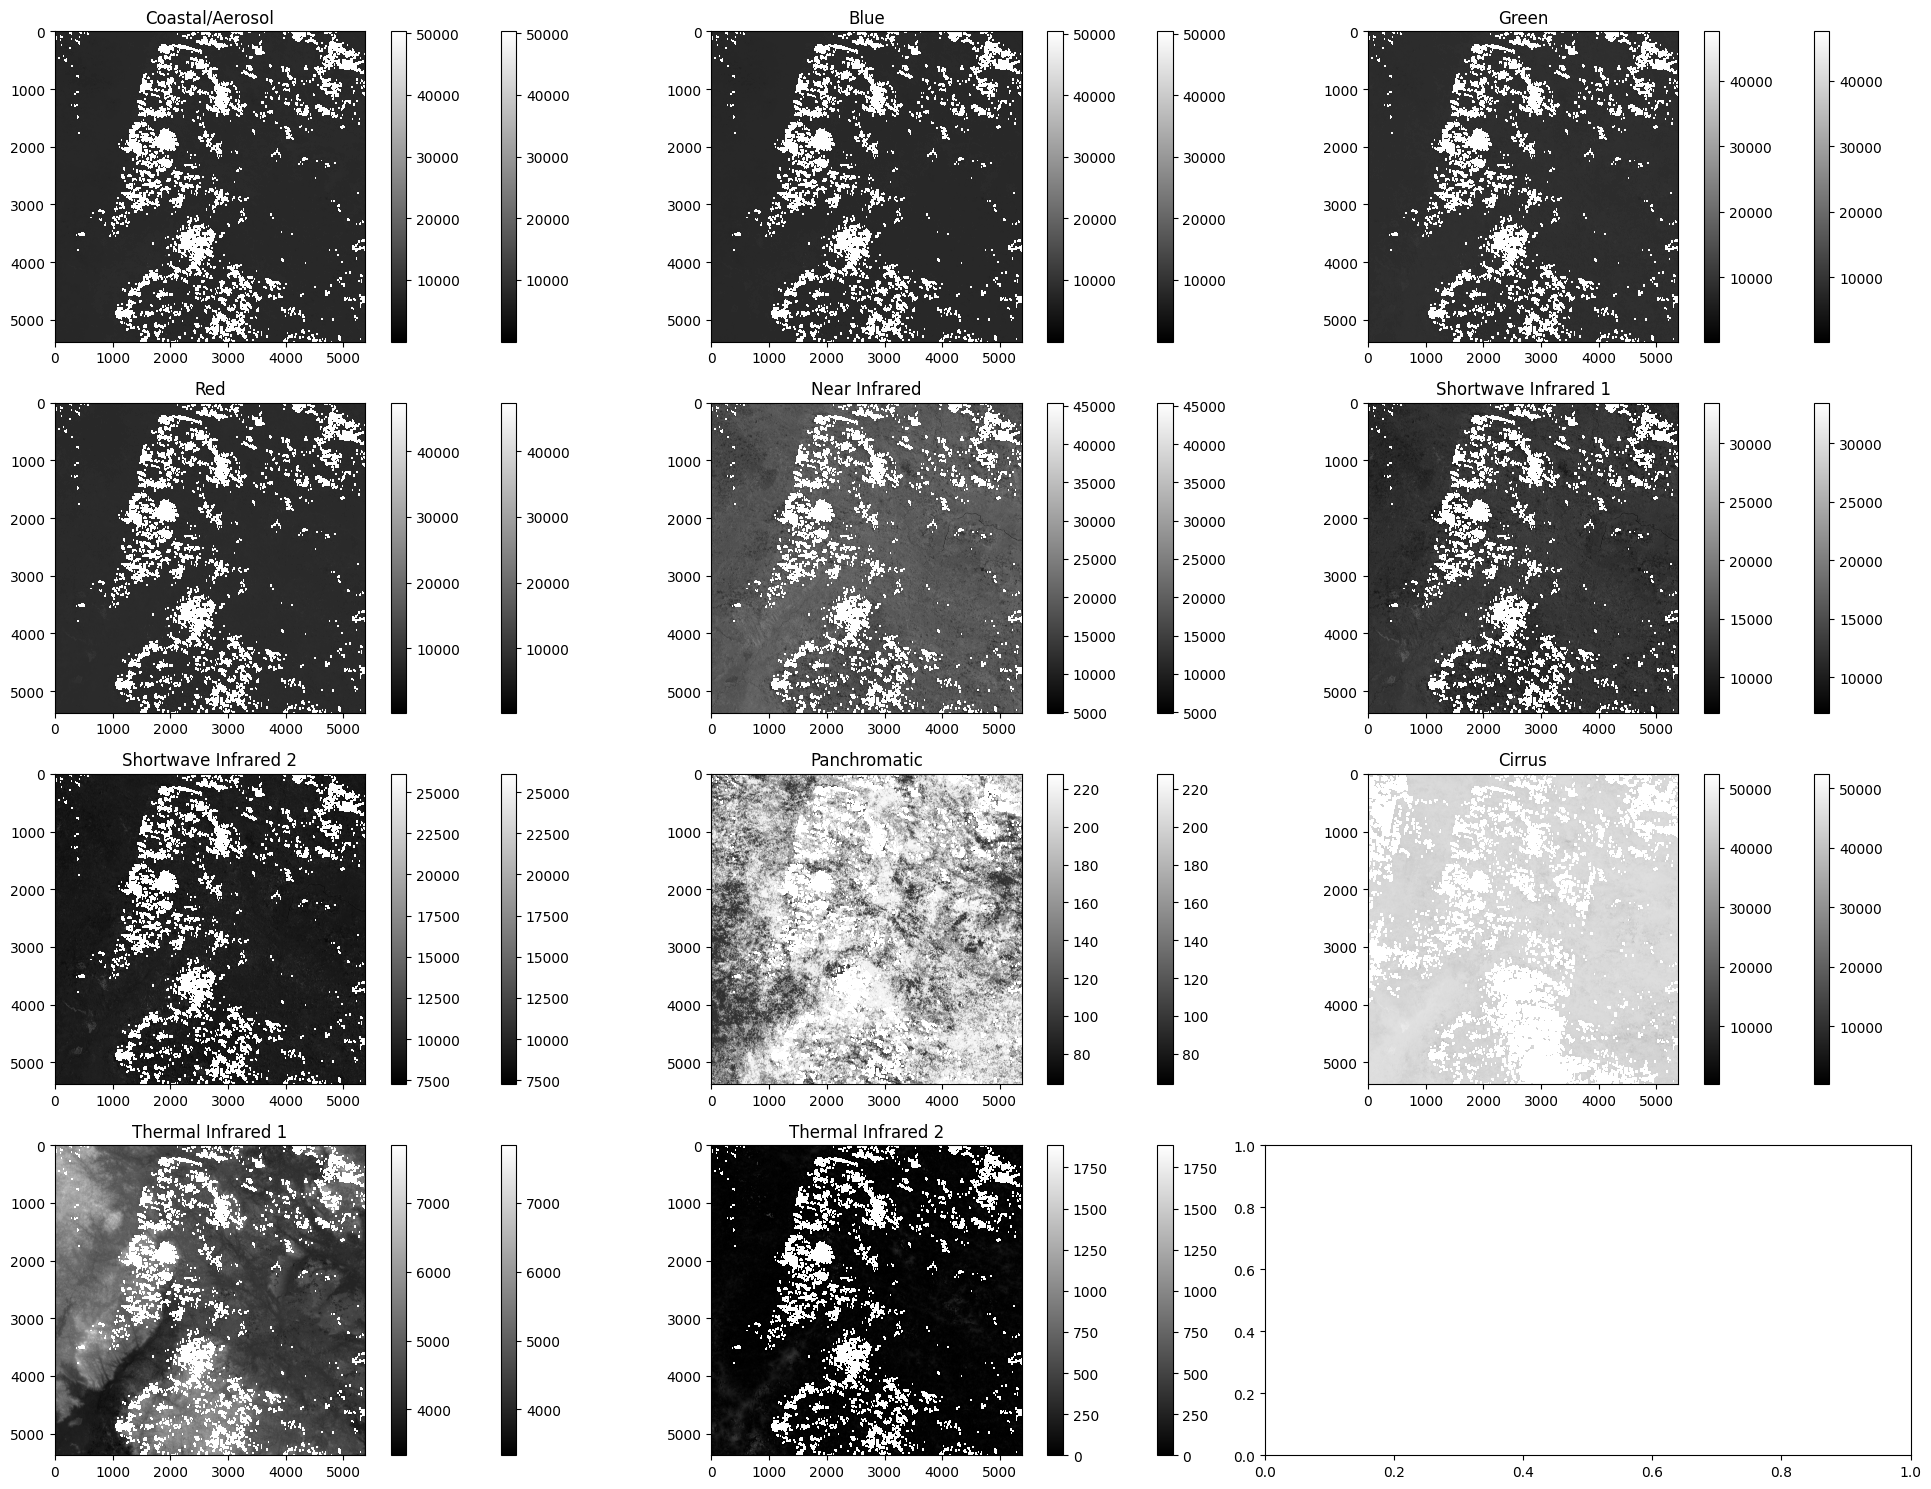

In [52]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
# Utilizando o pacote gdalpara abrir um pacote geoespacial específico
ds = gdal.Open('/content/drive/MyDrive/deforestation (2)/2013api-0000000000-0000000000.tif')

# Criando um dicionário que mapeia os números das bandas para seus nomes descritivos
band_names = {
    1: "Coastal/Aerosol",
    2: "Blue",
    3: "Green",
    4: "Red",
    5: "Near Infrared",
    6: "Shortwave Infrared 1",
    7: "Shortwave Infrared 2",
    8: "Panchromatic",
    9: "Cirrus",
    10: "Thermal Infrared 1",
    11: "Thermal Infrared 2",
}

# Criando uma grade de plots com 4 linhas e 3 colunas, definindo o tamanho da figura
fig, axs = plt.subplots(4, 3, figsize=(20, 15))

# Iterando sobre cada banda e nome no dicionário band_names
for band, name in band_names.items():

  # Identificando o subplot mais apropriado para plotar
  ax = axs[(band - 1) // 3, (band - 1) % 3]

  # Lendo os dados da banda atual como um array e exibindo na imagem
  im = ax.imshow(ds.GetRasterBand(band).ReadAsArray())
  # Adicionando uma barra de cores para a imagem
  fig.colorbar(im, ax=ax)

  # Definindo o título do subplot com o nome da banda
  ax.set_title(name)

  # Exibindo os gráficos
  plt.tight_layout()


  # Adicionamos uma barra de cores à imagem
  fig.colorbar(im, ax=ax)
  # Definimos o título do subplot com o nome da banda
  ax.set_title(name)

# Utilizando o tight_layout para garantir que os subplots não se sobreponham
plt.tight_layout()

# Exibindo a figura
plt.show()

### 2.6. O Índice de Diferença Normalizada da Vegetação
O **Índice de Diferença Normalizada da Vegetação** ou NDVI é um índice que é utilizado para demonstrar a diferença entre a refletância visível e próxima do infravermelho da cobertura vegetal e **pode ser usado para estimar a densidade de verde em uma área de terra**.

O NDVI é calculado conforme a seguinte fórmula:

$$
NDVI = \frac{(NIR - RED)}{(NIR  + RED)}
$$

onde `RED` e `NIR` representam as medidas de refletância espectral adquiridas nas regiões vermelha (visível) e próxima do infravermelho, respectivamente. O índice NDVI para uma área com vegetação deve estar entre 0.3 (vegetação leve) a 0.8 (vegetação densa). Nuvens terão um índice negativo, enquanto solo e corpos de água terão valores positivos baixos. Usaremos essas informações para estimar a vegetação de uma determinada região.

Em valores normalizados, ou seja, entre (0, 255), o intervalo de interesse corresponde às intensidades compreendidas entre 165 e 230.

**Região Próxima ao Infravermelho (NIR)**

A região **NIR** tem um comprimento de onda de 0.76 - 0.90 µm. A vida vegetal absorve luz visível de 0.4 µm (luz azul) até 0.7 µm (luz vermelha) para fotossíntese, com absorção máxima em ambas as extremidades deste espectro. Vemos as plantas como verdes porque elas normalmente não absorvem os comprimentos de onda verdes da luz (~0.5 µm) no meio desta faixa. No entanto, isso torna o canal verde menos preciso para a detecção de vegetação porque está dentro da gama completa de comprimentos de onda utilizados para a fotossíntese. Por outro lado, as plantas refletem fortemente a luz próxima do infravermelho (de 0.7 a 1.1 µm). Este fato é explorado no cálculo do NDVI.


In [53]:
def get_NDVI(ds):
    '''
    Calcula o Índice de Vegetação da Diferença Normalizada (NDVI) para uma imagem.

    Argumentos:
    ds -- Um objeto de conjunto de dados GDAL aberto que representa a imagem

    Retorna:
    ndvi -- Uma matriz numpy representando o NDVI da imagem
    '''
    r = ds.GetRasterBand(4).ReadAsArray()   # Banda Vermelha é a 4ª
    nir = ds.GetRasterBand(5).ReadAsArray() # Banda NIR é a 5ª
    ndvi = (nir - r)/(nir + r)
    ndvi = normalize255(ndvi)
    return ndvi

def normalize255(ndvi):
    '''
    Normaliza uma matriz de NDVI para a faixa de 0 a 255.

    Argumentos:
    ndvi -- Uma matriz numpy representando o NDVI

    Retorna:
    ndvi -- A matriz NDVI normalizada
    '''
    ndvi = ndvi + 1
    ndvi = (ndvi / 2) * 255
    return ndvi

def get_NDVI_mask(ndvi):
    '''
    Cria uma máscara de limiar para áreas de vegetação em uma matriz de NDVI.

    Argumentos:
    ndvi -- Uma matriz numpy representando o NDVI

    Retorna:
    mask -- Uma matriz binária onde os valores de 1 representam vegetação
    '''
    _, mask = cv2.threshold(ndvi, 170, 255, cv2.THRESH_BINARY)
    return mask

def percent_forest(mask):
    '''
    Calcula a porcentagem de pixels de vegetação em uma máscara.

    Argumentos:
    mask -- Uma matriz binária onde os valores de 1 representam vegetação

    Retorna:
    percent -- A porcentagem de pixels de vegetação
    '''
    c = cv2.countNonZero(mask)
    t = mask.shape[0] * mask.shape[1]
    return round((c / t) * 100, 4)

def plot_NDVI(path):
    '''
    Plota o NDVI e a máscara de vegetação de uma imagem e exibe a porcentagem de vegetação.

    Argumentos:
    path -- O caminho para o arquivo da imagem
    '''
    ds = gdal.Open(path)
    ndvi = get_NDVI(ds)
    ndvi_mask = get_NDVI_mask(ndvi)

    year = path.split('.')[0][:4]
    fig = plt.figure(figsize = (20, 5))
    fig = plt.subplot(1, 2, 1)
    plot = plt.imshow(ndvi, cmap = "gray")
    plt.colorbar()
    plt.title(year + ": " + "NDVI")
    plt.xticks([]), plt.yticks([])
    fig = plt.subplot(1, 2, 2)
    plot = plt.imshow(ndvi_mask, cmap = "gray");
    plt.title(str(percent_forest(ndvi_mask)) + "%")
    plt.xticks([]), plt.yticks([])
    plt.show()

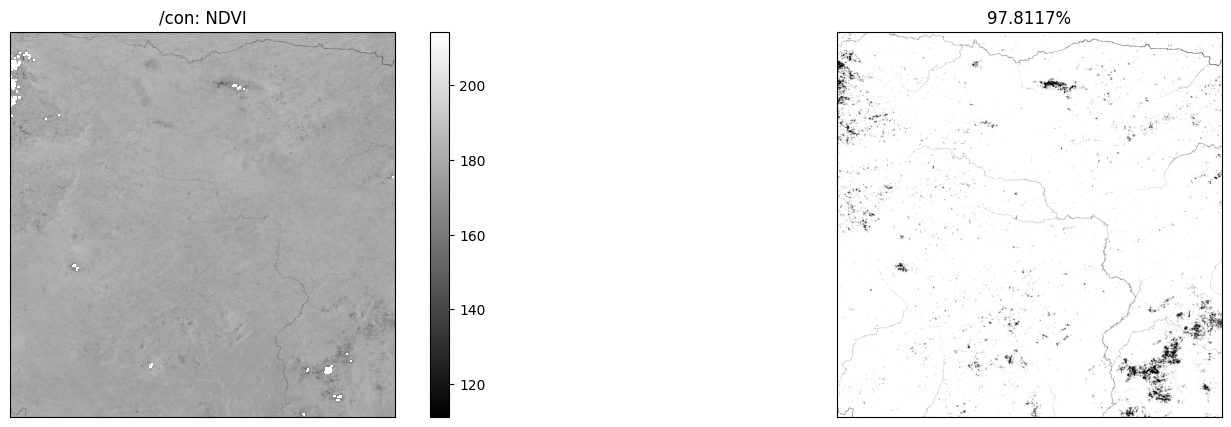

In [58]:
plot_NDVI("/content/drive/MyDrive/deforestation (2)/2013api-0000005376-0000005376.tif")

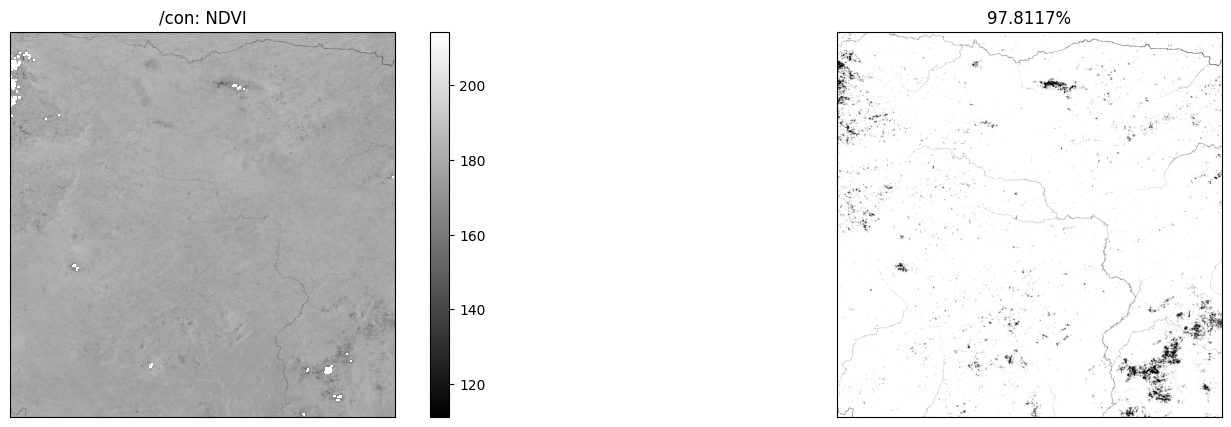

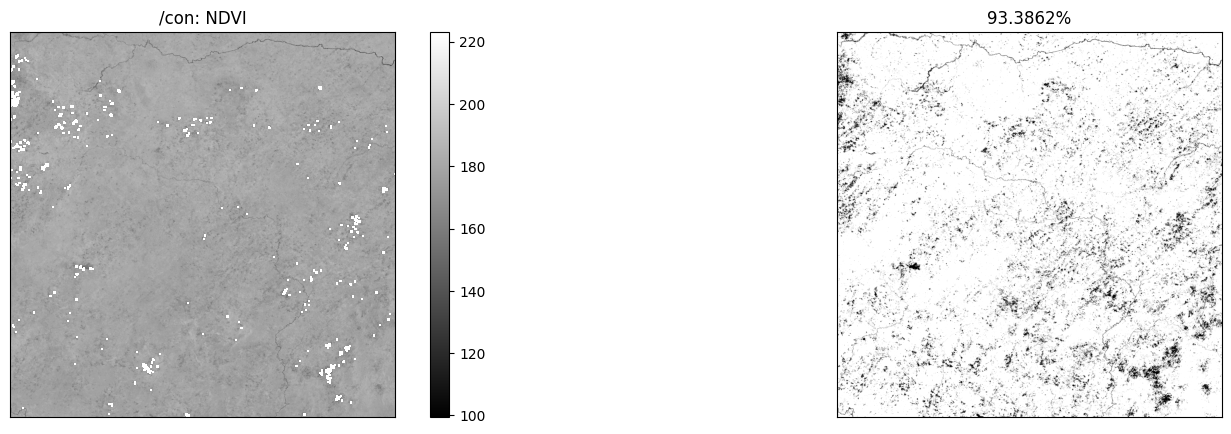

In [57]:
files = [
    "/content/drive/MyDrive/deforestation (2)/2013api-0000005376-0000005376.tif",
    "/content/drive/MyDrive/deforestation/2023api-0000005376-0000005376.tif"
]

for file in files:
    plot_NDVI(file)